In [1]:
system('ls', intern=TRUE)

system("gsutil cp gs://mcm_2023_data/Problem_C_Data_Wordle.xlsx ~/MCM_2023", intern=TRUE)
system("gsutil cp gs://mcm_2023_data/Valid_Words.txt ~/MCM_2023", intern=TRUE)

getwd()
setwd('~/MCM_2023')
getwd()


[1] "MCM_2023"       "Untitled.ipynb" "src"            "tutorials"

character(0)

character(0)

[1] "/home/jupyter"

[1] "/home/jupyter/MCM_2023"

In [2]:
library("readxl")
initialSet = read_xlsx("./Problem_C_Data_Wordle.xlsx", range = cell_cols("B3:M361"))

header.true <- function(initialSet) {
  names(initialSet) <- as.character(unlist(itinialSet[1,]))
  df[-1,]
}
head(initialSet)

colTemp <- initialSet[1,]

initialSet <- initialSet[-1,]

head(initialSet)

colnames(initialSet) = colTemp

head(initialSet)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`


...1,...2,...3,...4,...5,Percent in,...7,...8,...9,...10,...11,...12
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
44926,560,manly,20380,1899,0,2,17,37,29,12,2
44925,559,molar,21204,1973,0,4,21,38,26,9,1
44924,558,havoc,20001,1919,0,2,16,38,30,12,2
44923,557,impel,20160,1937,0,3,21,40,25,9,1
44922,556,condo,20879,2012,0,2,17,35,29,14,3


...1,...2,...3,...4,...5,Percent in,...7,...8,...9,...10,...11,...12
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
44926,560,manly,20380,1899,0,2,17,37,29,12,2
44925,559,molar,21204,1973,0,4,21,38,26,9,1
44924,558,havoc,20001,1919,0,2,16,38,30,12,2
44923,557,impel,20160,1937,0,3,21,40,25,9,1
44922,556,condo,20879,2012,0,2,17,35,29,14,3
44921,555,judge,20011,2043,0,2,8,16,26,33,14


Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
44926,560,manly,20380,1899,0,2,17,37,29,12,2
44925,559,molar,21204,1973,0,4,21,38,26,9,1
44924,558,havoc,20001,1919,0,2,16,38,30,12,2
44923,557,impel,20160,1937,0,3,21,40,25,9,1
44922,556,condo,20879,2012,0,2,17,35,29,14,3
44921,555,judge,20011,2043,0,2,8,16,26,33,14


In [3]:
install.packages("dplyr")
library(dplyr)
install.packages("corrr")
library('corrr')
library('ggplot2')
install.packages("ggcorrplot")
library(ggcorrplot)
install.packages("FactoMineR")
library("FactoMineR")
install.packages("factoextra")
library(factoextra)


Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [4]:
vWords = read.table('./Valid_Words.txt',sep='\n')

vWords <- vWords[[1]]

head(vWords)

temp = initialSet[['Word']]

for (item in temp){
    if (!(item %in% vWords)){
        print(item)    
    }
}




[1] "aback" "abase" "abate" "abbey" "abbot" "abhor"

In [5]:
#head(initialSet[,6:12])


successSet <- initialSet[,6:12]
head(as.numeric(successSet[1,]))

successSet <- mutate_all(successSet, function(x) as.numeric(as.character(x)))

head(successSet)
                         
successSet$'1 try'<-.01*(successSet$'1 try')
successSet$'2 tries'<-.02*(successSet$'2 tries')
successSet$'3 tries'<-.03*(successSet$'3 tries')
successSet$'4 tries'<-.04*(successSet$'4 tries')
successSet$'5 tries'<-.05*(successSet$'5 tries')
successSet$'6 tries'<-.06*(successSet$'6 tries')
successSet$'7 or more tries (X)'<-.07*(successSet$'7 or more tries (X)')

head(successSet)

successSet <- mutate_all(successSet, function(x) as.numeric(as.character(x)))
                         
head(successSet)
                         
initialSet$avg <- apply(successSet, 1, sum, na.rm=TRUE)
initialSet$stDev <- apply(successSet, 1, sd, na.rm=TRUE)
                             
head(initialSet)

[1]  0  2 17 37 29 12

1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2,17,37,29,12,2
0,4,21,38,26,9,1
0,2,16,38,30,12,2
0,3,21,40,25,9,1
0,2,17,35,29,14,3
0,2,8,16,26,33,14


1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.04,0.51,1.48,1.45,0.72,0.14
0,0.08,0.63,1.52,1.30,0.54,0.07
0,0.04,0.48,1.52,1.50,0.72,0.14
0,0.06,0.63,1.60,1.25,0.54,0.07
0,0.04,0.51,1.40,1.45,0.84,0.21
0,0.04,0.24,0.64,1.30,1.98,0.98


1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.04,0.51,1.48,1.45,0.72,0.14
0,0.08,0.63,1.52,1.30,0.54,0.07
0,0.04,0.48,1.52,1.50,0.72,0.14
0,0.06,0.63,1.60,1.25,0.54,0.07
0,0.04,0.51,1.40,1.45,0.84,0.21
0,0.04,0.24,0.64,1.30,1.98,0.98


Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),avg,stDev
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
44926,560,manly,20380,1899,0,2,17,37,29,12,2,4.34,0.6326927
44925,559,molar,21204,1973,0,4,21,38,26,9,1,4.14,0.6126018
44924,558,havoc,20001,1919,0,2,16,38,30,12,2,4.40,0.6537948
44923,557,impel,20160,1937,0,3,21,40,25,9,1,4.15,0.6270490
44922,556,condo,20879,2012,0,2,17,35,29,14,3,4.45,0.6116878
44921,555,judge,20011,2043,0,2,8,16,26,33,14,5.18,0.7310267


In [6]:
initialSet[which.max(initialSet$'avg'),]

sortedInitial <- initialSet[order(initialSet$'avg', decreasing = TRUE),]
head(sortedInitial, 15)

Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),avg,stDev
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
44820,454,parer,37309,4130,0,0,4,11,15,22,48,5.99,1.202551


Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),avg,stDev
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
44820,454,parer,37309,4130,0,0,4,11,15,22,48,5.99,1.2025509
44647,281,nymph,165468,9935,1,2,18,44,26,26,9,5.84,0.7117082
44857,491,mummy,29279,3021,0,1,4,14,27,37,18,5.53,0.8463845
44775,409,coyly,34909,3380,0,0,4,17,28,35,15,5.35,0.8021192
44670,304,foyer,108899,8198,0,2,10,19,19,23,26,5.25,0.6893233
44921,555,judge,20011,2043,0,2,8,16,26,33,14,5.18,0.7310267
44741,375,gawky,45645,3957,0,1,5,22,33,28,10,5.08,0.7240593
44611,245,swill,282327,11241,1,1,8,19,31,30,10,5.08,0.7166556
44748,382,fluff,47344,4049,0,0,4,25,44,23,4,4.98,0.8459990


In [7]:
system("gsutil cp gs://mcm_2023_data/dataSum.csv ~/MCM_2023", intern=TRUE)
dataSum = read.table('./dataSum.csv',sep=',', header=TRUE)
head(dataSum)

character(0)

,Date,Contest.number,Word,Number.of..reported.results,Number.in.hard.mode,X1.try,X2.tries,X3.tries,X4.tries,X5.tries,X6.tries,X7.or.more.tries..X.,percentHardmode,wordFreq,wordFreqNorm
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2022-12-31 00:00:00,560,manly,20380,1899,0,2,17,37,29,12,2,0.09317959,4.57e-06,0.0021355140
2,2022-12-30 00:00:00,559,molar,21204,1973,0,4,21,38,26,9,1,0.09304848,9.77e-07,0.0004565421
3,2022-12-29 00:00:00,558,havoc,20001,1919,0,2,16,38,30,12,2,0.09594520,3.16e-06,0.0014766355
4,2022-12-28 00:00:00,557,impel,20160,1937,0,3,21,40,25,9,1,0.09608135,2.29e-07,0.0001070093
5,2022-12-27 00:00:00,556,condo,20879,2012,0,2,17,35,29,14,3,0.09636477,4.27e-06,0.0019953271
6,2022-12-26 00:00:00,555,judge,20011,2043,0,2,8,16,26,33,14,0.10209385,8.91e-05,0.0416355140


In [8]:
combinedSet <- initialSet
combinedSet$percentHardMode <- dataSum[,'percentHardmode']
combinedSet$wordFreq <- dataSum[,'wordFreq']

head(combinedSet)

Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),avg,stDev,percentHardMode,wordFreq
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
44926,560,manly,20380,1899,0,2,17,37,29,12,2,4.34,0.6326927,0.09317959,4.57e-06
44925,559,molar,21204,1973,0,4,21,38,26,9,1,4.14,0.6126018,0.09304848,9.77e-07
44924,558,havoc,20001,1919,0,2,16,38,30,12,2,4.40,0.6537948,0.09594520,3.16e-06
44923,557,impel,20160,1937,0,3,21,40,25,9,1,4.15,0.6270490,0.09608135,2.29e-07
44922,556,condo,20879,2012,0,2,17,35,29,14,3,4.45,0.6116878,0.09636477,4.27e-06
44921,555,judge,20011,2043,0,2,8,16,26,33,14,5.18,0.7310267,0.10209385,8.91e-05


In [9]:
highestFreq <- max(combinedSet$wordFreq)
lowestFreq <- min(combinedSet$wordFreq)
print(highestFreq)
print(lowestFreq)


combinedSet$adjFreq <- combinedSet$wordFreq / highestFreq

combinedSet <- subset(combinedSet, select = -c(wordFreq))

head(combinedSet)
highestFreq <- max(combinedSet$adjFreq)
lowestFreq <- min(combinedSet$adjFreq)
print(highestFreq)
print(lowestFreq)


[1] 0.00214
[1] 3.55e-08


Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),avg,stDev,percentHardMode,adjFreq
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
44926,560,manly,20380,1899,0,2,17,37,29,12,2,4.34,0.6326927,0.09317959,0.0021355140
44925,559,molar,21204,1973,0,4,21,38,26,9,1,4.14,0.6126018,0.09304848,0.0004565421
44924,558,havoc,20001,1919,0,2,16,38,30,12,2,4.40,0.6537948,0.09594520,0.0014766355
44923,557,impel,20160,1937,0,3,21,40,25,9,1,4.15,0.6270490,0.09608135,0.0001070093
44922,556,condo,20879,2012,0,2,17,35,29,14,3,4.45,0.6116878,0.09636477,0.0019953271
44921,555,judge,20011,2043,0,2,8,16,26,33,14,5.18,0.7310267,0.10209385,0.0416355140


[1] 1
[1] 1.658879e-05


In [10]:
words <- combinedSet$Word

countLetter <- function(word){
    counts <- c()
    for (letter in letters){
        counts <- append(counts, lengths(regmatches(word, gregexpr(letter, word))))
    }
return(counts)
}

combinedSet$counts <- lapply(words, countLetter)
head(combinedSet)

library(dplyr)
library(tidyr)

combinedSet <- combinedSet %>% separate(counts, letters, remove = TRUE, sep = ', ', fill="right")

combinedSet$a<-gsub('\\(',"",as.character(combinedSet$a))
combinedSet$a<-gsub('c',"",as.character(combinedSet$a))
combinedSet$z<-gsub('\\)',"",as.character(combinedSet$z))

head(combinedSet)

write.csv(combinedSet, "./combinedData.csv")
system("gsutil cp  ./combinedData.csv gs://mcm_2023_data/", intern=TRUE)

Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),avg,stDev,percentHardMode,adjFreq,counts
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<list>
44926,560,manly,20380,1899,0,2,17,37,29,12,2,4.34,0.6326927,0.09317959,0.0021355140,"1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0"
44925,559,molar,21204,1973,0,4,21,38,26,9,1,4.14,0.6126018,0.09304848,0.0004565421,"1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0"
44924,558,havoc,20001,1919,0,2,16,38,30,12,2,4.40,0.6537948,0.09594520,0.0014766355,"1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0"
44923,557,impel,20160,1937,0,3,21,40,25,9,1,4.15,0.6270490,0.09608135,0.0001070093,"0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
44922,556,condo,20879,2012,0,2,17,35,29,14,3,4.45,0.6116878,0.09636477,0.0019953271,"0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
44921,555,judge,20011,2043,0,2,8,16,26,33,14,5.18,0.7310267,0.10209385,0.0416355140,"0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0"


Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,⋯,q,r,s,t,u,v,w,x,y,z
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
44926,560,manly,20380,1899,0,2,17,37,29,⋯,0,0,0,0,0,0,0,0,1,0
44925,559,molar,21204,1973,0,4,21,38,26,⋯,0,1,0,0,0,0,0,0,0,0
44924,558,havoc,20001,1919,0,2,16,38,30,⋯,0,0,0,0,0,1,0,0,0,0
44923,557,impel,20160,1937,0,3,21,40,25,⋯,0,0,0,0,0,0,0,0,0,0
44922,556,condo,20879,2012,0,2,17,35,29,⋯,0,0,0,0,0,0,0,0,0,0
44921,555,judge,20011,2043,0,2,8,16,26,⋯,0,0,0,0,1,0,0,0,0,0


character(0)

In [11]:
reportedResults <- combinedSet[,c(4,5)]
#transform(reportedResults, "Number of reported results" = as.numeric("Number of reported results"), "Number in hard mode" = as.numeric("Number in hard mode"))
reportedResults$date <- 1:nrow(reportedResults)
head(reportedResults)

Number of reported results,Number in hard mode,date
<chr>,<chr>,<int>
20380,1899,1
21204,1973,2
20001,1919,3
20160,1937,4
20879,2012,5
20011,2043,6


Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Loading required package: TTR



Users,Hard,Time
<dbl>,<dbl>,<int>
20380,1899,1
21204,1973,2
20001,1919,3
20160,1937,4
20879,2012,5
20011,2043,6


Users,Hard,Time,smoothed,diff
<dbl>,<dbl>,<int>,<dbl>,<dbl>
20380,1899,1,20266.62,113.3788
21204,1973,2,20268.56,935.4360
20001,1919,3,20292.81,-291.8071
20160,1937,4,20346.94,-186.9372
20879,2012,5,20438.08,440.9184
20011,2043,6,20571.41,-560.4073


Saving 6.67 x 6.67 in image


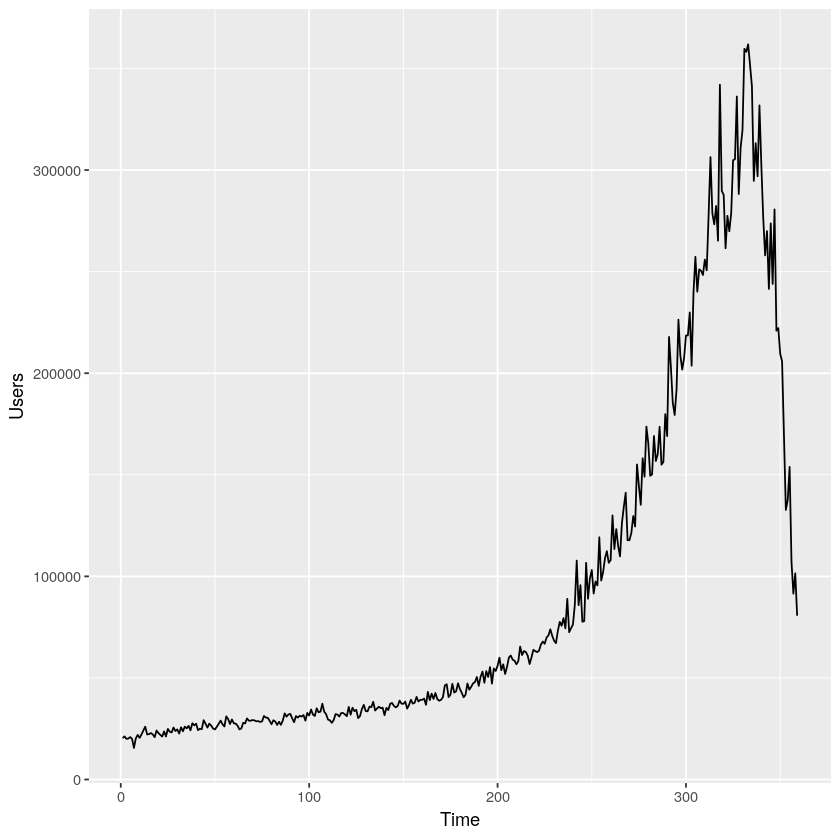

Saving 6.67 x 6.67 in image


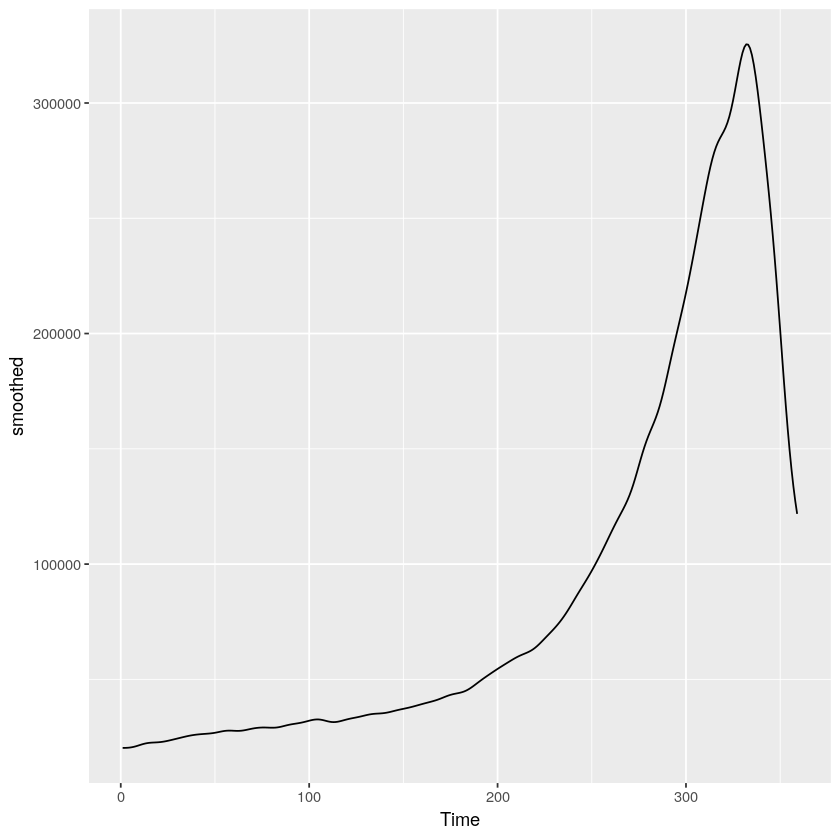

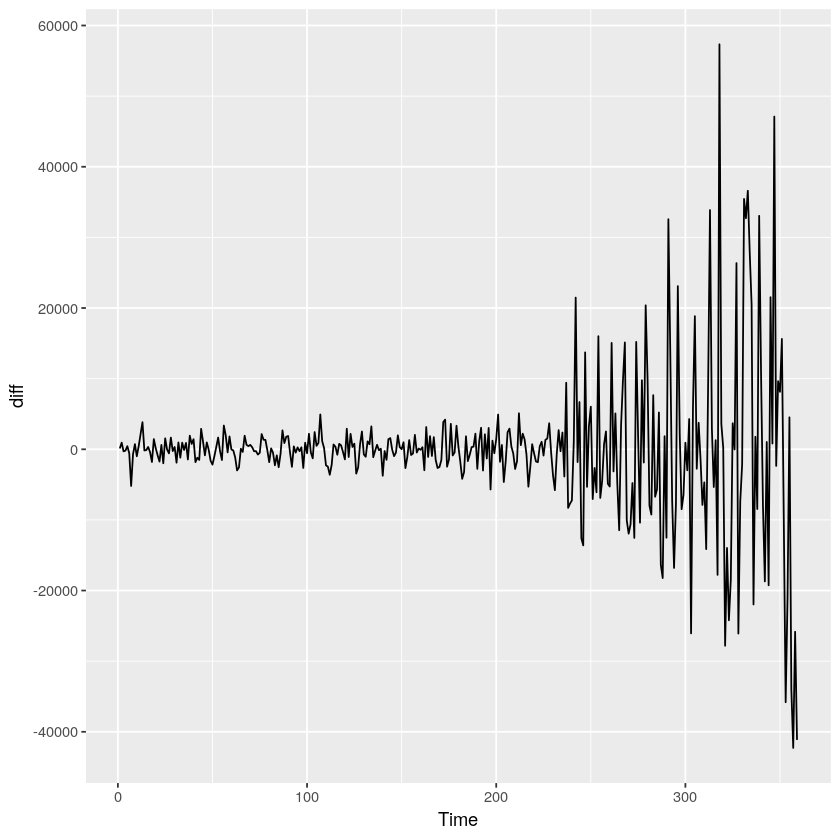

smoothPoints,
1,20266.62
2,20268.56
3,20292.81
4,20346.94
5,20438.08
6,20571.41


character(0)

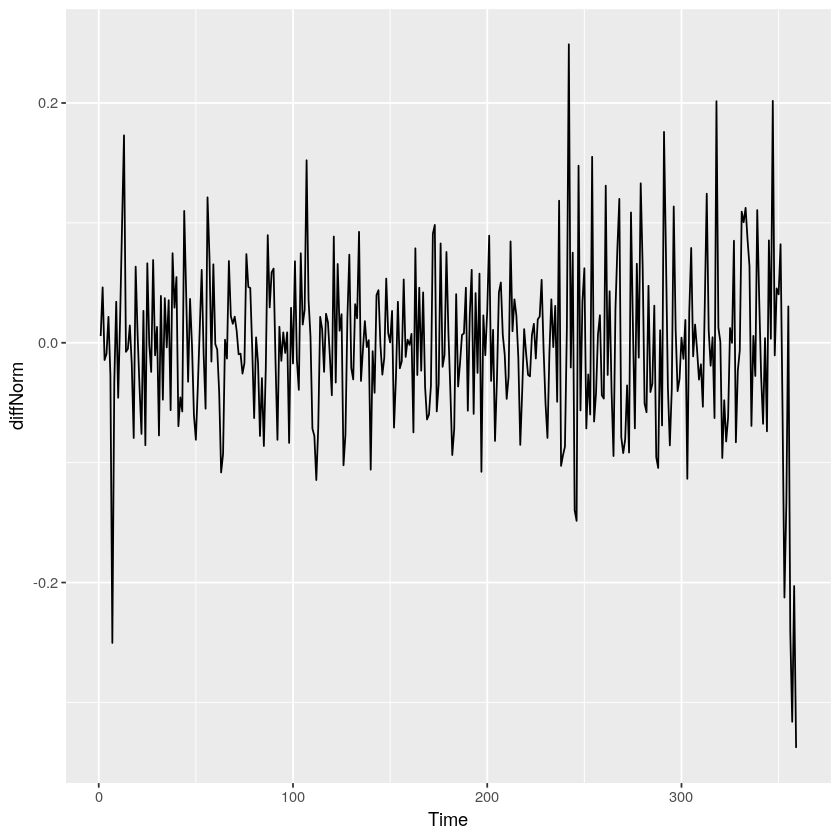

In [12]:
library(ggplot2)
install.packages("smoother")
library(smoother)

myFrame <- reportedResults

colnames(myFrame)[1] = "Users"
colnames(myFrame)[2] = "Hard"
colnames(myFrame)[3] = "Time"

myFrame$Users = as.numeric(as.character(myFrame$Users))
myFrame$Hard = as.numeric(as.character(myFrame$Hard))

head(myFrame)

myFrame$smoothed <- smth.gaussian(x = myFrame$Users, window = 45, tails = TRUE, alpha = 5)

myFrame$diff <- myFrame$Users-myFrame$smoothed

head(myFrame)

#xAxis <- myFrame[,"Time"]

#colors <- c("Average"="purple")

options(scipen=999)

p <- ggplot(myFrame, aes(x=Time, y = Users))  + geom_line()
print(p)
ggsave(file="rawCurve.png")
#system("gsutil cp  ./rawCurve.png gs://mcm_2023_data/", intern=TRUE)

p <- ggplot(myFrame, aes(x=Time, y = smoothed))  + geom_line()
print(p)
ggsave(file="smoothCurve.png")
#system("gsutil cp  ./smoothCurve.png gs://mcm_2023_data/", intern=TRUE)

p <- ggplot(myFrame, aes(x=Time, y = diff))  + geom_line()
myFrame$diffNorm <- myFrame$diff / myFrame$smoothed
print(p)

p <- ggplot(myFrame, aes(x=Time, y = diffNorm))  + geom_line()
print(p)

combinedSet$normUsers <- myFrame$diff

combinedSet$normAdjUsers <- myFrame$diffNorm

#write.csv(combinedSet, "./adjNorm.csv")
#system("gsutil cp  ./adjNorm.csv gs://mcm_2023_data/", intern=TRUE)

smoothPoints <-  myFrame$Time

smoothPoints <- cbind(smoothPoints,myFrame$smoothed)
head(smoothPoints)

write.csv(smoothPoints, "./smoothedVTime.csv")
system("gsutil cp  ./smoothedVTime.csv gs://mcm_2023_data/", intern=TRUE)



a,b,c,d,e,f,g,h,i,j,⋯,w,x,y,z,peopleAdj,hard,score,vowel,cons,uniqueLetters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0.005594360,0.09317959,4.34,1,4,5
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0.046152063,0.09304848,4.14,2,3,5
1,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,-0.014379829,0.09594520,4.40,2,3,5
0,0,0,0,1,0,0,0,1,0,⋯,0,0,0,0,-0.009187484,0.09608135,4.15,2,3,5
0,0,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0.021573373,0.09636477,4.45,2,3,4
0,0,0,1,1,0,1,0,0,1,⋯,0,0,0,0,-0.027242050,0.10209385,5.18,2,3,5


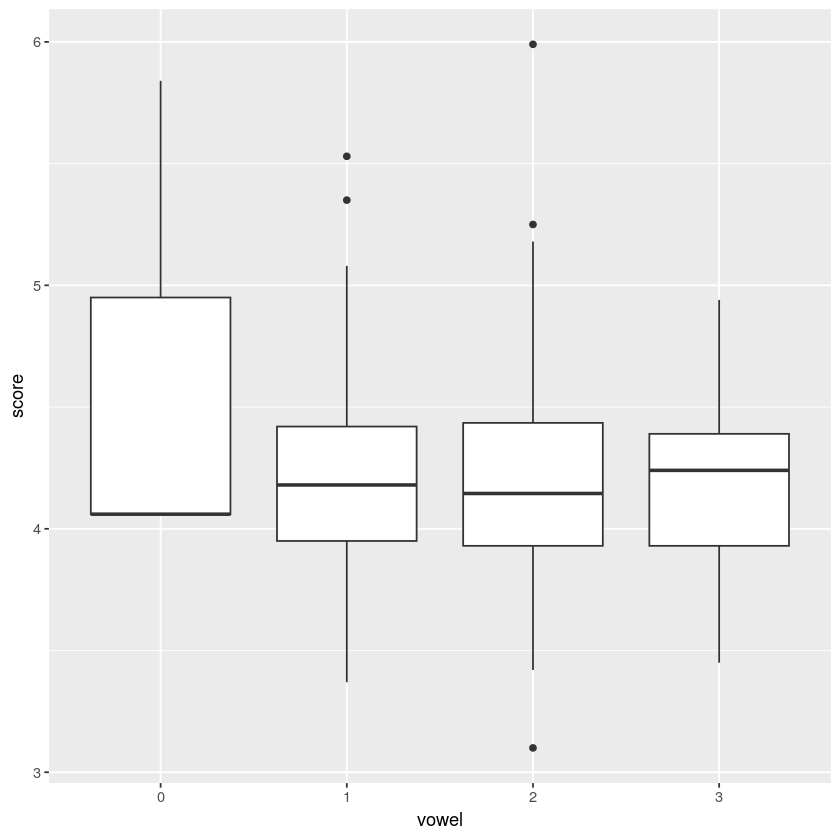

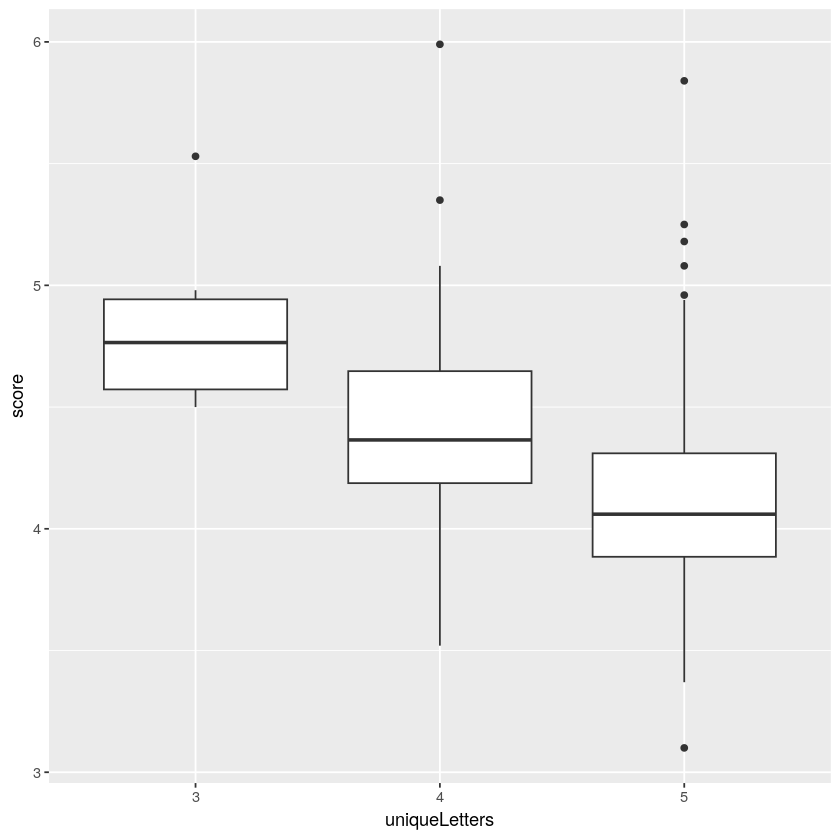

In [13]:
letterResults <- combinedSet[,letters]

#letterResults <- lapply(letterResults,as.numeric)

library(dplyr)
letterResults <- letterResults %>% mutate_if(is.character, as.numeric)

letterResults$peopleAdj <- combinedSet$normAdjUsers
letterResults$hard <- combinedSet$percentHardMode
letterResults$score <- combinedSet$avg

#head(letterResults)
letterResults$vowel <- letterResults$a + letterResults$e + letterResults$i + letterResults$o + letterResults$u 
letterResults$cons <- letterResults$b + letterResults$c + letterResults$d + letterResults$f + letterResults$g + letterResults$h + letterResults$j + letterResults$k + letterResults$l + letterResults$m + letterResults$n + letterResults$p + letterResults$q + letterResults$r + letterResults$s + letterResults$t + letterResults$v + letterResults$w + letterResults$x + letterResults$y + letterResults$z 

#letterResults$maxDup<-pmax(letterResults[,letters])
letterResults$uniqueLetters <- 26-rowSums(letterResults[,letters]==0)



head(letterResults)

letterResults$vowel <- as.factor(letterResults$vowel)

p <- ggplot(letterResults, aes(x=vowel, y=score))  + geom_boxplot()
print(p)
#ggsave(file="vowelVScore.png")
#system("gsutil cp ./vowelVScore.png gs://mcm_2023_data/", intern=TRUE)

letterResults$uniqueLetters <- as.factor(letterResults$uniqueLetters)

p <- ggplot(letterResults, aes(x=uniqueLetters, y=score))  + geom_boxplot()
print(p)



#filter(letterResults, )

#write.csv(combinedSet, "./letterData.csv")
#system("gsutil cp  ./letterData.csv gs://mcm_2023_data/", intern=TRUE)


In [14]:

noVow <- filter(letterResults, vowel == 0)
oneVow <- filter(letterResults, vowel == 1)
twoVow <- filter(letterResults, vowel == 2)
threeVow <- filter(letterResults, vowel == 3)

print(mean(noVow$score) )
print(mean(oneVow$score) )
print(mean(twoVow$score) )
print(mean(threeVow$score) )

print(mean(noVow$peopleAdj))
print(mean(oneVow$peopleAdj))
print(mean(twoVow$peopleAdj))
print(mean(threeVow$peopleAdj))

print(mean(noVow$hard))
print(mean(oneVow$hard))
print(mean(twoVow$hard))
print(mean(threeVow$hard))

tempDF <- data.frame(letters)

tempDF['with'] <- NA
tempDF['wout'] <- NA
tempDF['diff'] <- NA

head(tempDF)

for(i in 1:26) {
    temp1 <- letterResults[letterResults[,i]==0, ]
    temp2 <- letterResults[letterResults[,i]!=0, ]
    tempDF[i,2] <- mean(temp1$score)
    tempDF[i,3] <- mean(temp2$score)
    tempDF[i,4] <- mean(temp1$score) - mean(temp2$score)
    print(paste(i, mean(temp1$score), mean(temp2$score),mean(temp1$score) - mean(temp2$score)))
}
head(tempDF)

[1] 4.653333
[1] 4.225333
[1] 4.169769
[1] 4.193143
[1] 0.08430792
[1] 0.001710151
[1] -0.003162901
[1] -0.02841905
[1] 0.08144408
[1] 0.07314737
[1] 0.07547008
[1] 0.08108202


,letters,with,wout,diff
,<chr>,<lgl>,<lgl>,<lgl>
1,a,NA,NA,NA
2,b,NA,NA,NA
3,c,NA,NA,NA
4,d,NA,NA,NA
5,e,NA,NA,NA
6,f,NA,NA,NA


[1] "1 4.22852380952381 4.14134228187919 0.0871815276446153"
[1] "2 4.19085106382979 4.20866666666667 -0.0178156028368797"
[1] "3 4.1936301369863 4.18671641791045 0.00691371907585303"
[1] "4 4.19628664495114 4.16903846153846 0.027248183412679"
[1] "5 4.19567010309278 4.18842424242424 0.00724586066854105"
[1] "6 4.18440729483283 4.27933333333333 -0.0949260385005068"
[1] "7 4.16666666666667 4.36276595744681 -0.196099290780142"
[1] "8 4.21179310344828 4.11057971014493 0.101213393303349"
[1] "9 4.23892307692308 4.07 0.168923076923076"
[1] "10 4.18777464788732 4.5975 -0.409725352112676"
[1] "11 4.18515337423313 4.26333333333333 -0.078179959100205"
[1] "12 4.19340996168582 4.18948979591837 0.00392016576745569"
[1] "13 4.19431818181818 4.18039215686275 0.0139260249554365"
[1] "14 4.21454212454212 4.12186046511628 0.0926816594258462"
[1] "15 4.18208333333333 4.21302521008403 -0.0309418767507008"
[1] "16 4.20861952861953 4.11435483870968 0.0942646899098509"
[1] "17 4.19093220338983 4.292 -0.101

,letters,with,wout,diff
,<chr>,<dbl>,<dbl>,<dbl>
1,a,4.228524,4.141342,0.087181528
2,b,4.190851,4.208667,-0.017815603
3,c,4.193630,4.186716,0.006913719
4,d,4.196287,4.169038,0.027248183
5,e,4.195670,4.188424,0.007245861
6,f,4.184407,4.279333,-0.094926039


In [15]:
letterFreq <- tempDF[order(tempDF$diff, decreasing = TRUE),]
head(letterFreq, 27)




,letters,with,wout,diff
,<chr>,<dbl>,<dbl>,<dbl>
20,t,4.283966,4.014344,0.269621982
9,i,4.238923,4.070000,0.168923077
19,s,4.229709,4.070000,0.159709091
8,h,4.211793,4.110580,0.101213393
16,p,4.208620,4.114355,0.094264690
14,n,4.214542,4.121860,0.092681659
1,a,4.228524,4.141342,0.087181528
18,r,4.222271,4.139615,0.082655358
4,d,4.196287,4.169038,0.027248183


In [16]:
#print(combinedSet)

#combinedSet$adjFac <- 
#print(as.numeric(unlist(tempDF$diff)))

#print(as.numeric(unlist(combinedSet[3, 17:42])))

adjust <- function(n){
    adjNum <- sum(as.numeric(unlist(tempDF$diff)) * as.numeric(unlist(combinedSet[n, 17:42])))
    return(adjNum)
}

print(adjust(4))

combinedSet$adjFac <- NA

for (i in 1:nrow(combinedSet)){
combinedSet[i, ncol(combinedSet)] <- adjust(i)
}

head(combinedSet)


system("gsutil cp gs://mcm_2023_data/letterFreq.csv ~/MCM_2023", intern=TRUE)
letterFreq = read.table('./letterFreq.csv',sep=',')

modify <- function(n){
    adjNum <- sum(as.numeric(unlist(letterFreq[,2])) * as.numeric(unlist(combinedSet[n, 17:42])))
    return(adjNum)
}
combinedSet$letFreq <- NA

for (i in 1:nrow(combinedSet)){
    combinedSet[i, ncol(combinedSet)] <- adjust(i)
}

head(combinedSet)


[1] 0.2882798


Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,⋯,t,u,v,w,x,y,z,normUsers,normAdjUsers,adjFac
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
44926,560,manly,20380,1899,0,2,17,37,29,⋯,0,0,0,0,0,1,0,113.3788,0.005594360,-0.03121035
44925,559,molar,21204,1973,0,4,21,38,26,⋯,0,0,0,0,0,0,0,935.4360,0.046152063,0.15674120
44924,558,havoc,20001,1919,0,2,16,38,30,⋯,0,0,1,0,0,0,0,-291.8071,-0.014379829,-0.02914692
44923,557,impel,20160,1937,0,3,21,40,25,⋯,0,0,0,0,0,0,0,-186.9372,-0.009187484,0.28827982
44922,556,condo,20879,2012,0,2,17,35,29,⋯,0,0,0,0,0,0,0,440.9184,0.021573373,0.06495981
44921,555,judge,20011,2043,0,2,8,16,26,⋯,0,1,0,0,0,0,0,-560.4073,-0.027242050,-0.65066826


character(0)

Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,⋯,u,v,w,x,y,z,normUsers,normAdjUsers,adjFac,letFreq
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
44926,560,manly,20380,1899,0,2,17,37,29,⋯,0,0,0,0,1,0,113.3788,0.005594360,-0.03121035,-0.03121035
44925,559,molar,21204,1973,0,4,21,38,26,⋯,0,0,0,0,0,0,935.4360,0.046152063,0.15674120,0.15674120
44924,558,havoc,20001,1919,0,2,16,38,30,⋯,0,1,0,0,0,0,-291.8071,-0.014379829,-0.02914692,-0.02914692
44923,557,impel,20160,1937,0,3,21,40,25,⋯,0,0,0,0,0,0,-186.9372,-0.009187484,0.28827982,0.28827982
44922,556,condo,20879,2012,0,2,17,35,29,⋯,0,0,0,0,0,0,440.9184,0.021573373,0.06495981,0.06495981
44921,555,judge,20011,2043,0,2,8,16,26,⋯,1,0,0,0,0,0,-560.4073,-0.027242050,-0.65066826,-0.65066826


In [17]:
system("gsutil cp gs://mcm_2023_data/projected.csv ~/MCM_2023", intern=TRUE)

finalRes = read.table('./projected.csv',sep=',', header=TRUE)


#head(finalRes)


head(letterFreq)

colnames(finalRes) <- c("word", "two", "three", "four", "freq", "score")

finalRes$unique <- letterResults$uniqueLetters

finalRes$letAdj <- combinedSet$adjFac

finalRes$letFreq <- combinedSet$letFreq





finalRes <- finalRes[, c("word", "two", "three", "four", "freq", "letAdj", "unique", "letFreq", "score")]

head(finalRes)

write.csv(finalRes, "./optimize.csv")

character(0)

,V1,V2
,<chr>,<dbl>
1,a,0.61657003
2,b,0.15937744
3,c,0.36597166
4,d,0.25876862
5,e,0.67173521
6,f,0.09276965


,word,two,three,four,freq,letAdj,unique,letFreq,score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,manly,1.3453627,0.34230453,0.023127605,0.005,-0.03121035,5,-0.03121035,4.34
2,molar,1.3980539,0.37733783,0.038456367,0.005,0.15674120,5,0.15674120,4.14
3,havoc,0.4933752,0.04570751,0.002016942,0.005,-0.02914692,5,-0.02914692,4.40
4,impel,0.7906757,0.21457896,0.042490251,0.005,0.28827982,5,0.28827982,4.15
5,condo,1.4388890,0.54319861,0.051095872,0.005,0.06495981,4,0.06495981,4.45
6,judge,0.2727380,0.06659976,0.020438349,0.008,-0.65066826,5,-0.65066826,5.18


,word,two,three,four,freq,letAdj,unique,letFreq,score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,manly,1.3453627,0.34230453,0.023127605,0.005,-0.03121035,5,-0.03121035,4.34
2,molar,1.3980539,0.37733783,0.038456367,0.005,0.15674120,5,0.15674120,4.14
3,havoc,0.4933752,0.04570751,0.002016942,0.005,-0.02914692,5,-0.02914692,4.40
4,impel,0.7906757,0.21457896,0.042490251,0.005,0.28827982,5,0.28827982,4.15
5,condo,1.4388890,0.54319861,0.051095872,0.005,0.06495981,4,0.06495981,4.45
6,judge,0.2727380,0.06659976,0.020438349,0.008,-0.65066826,5,-0.65066826,5.18


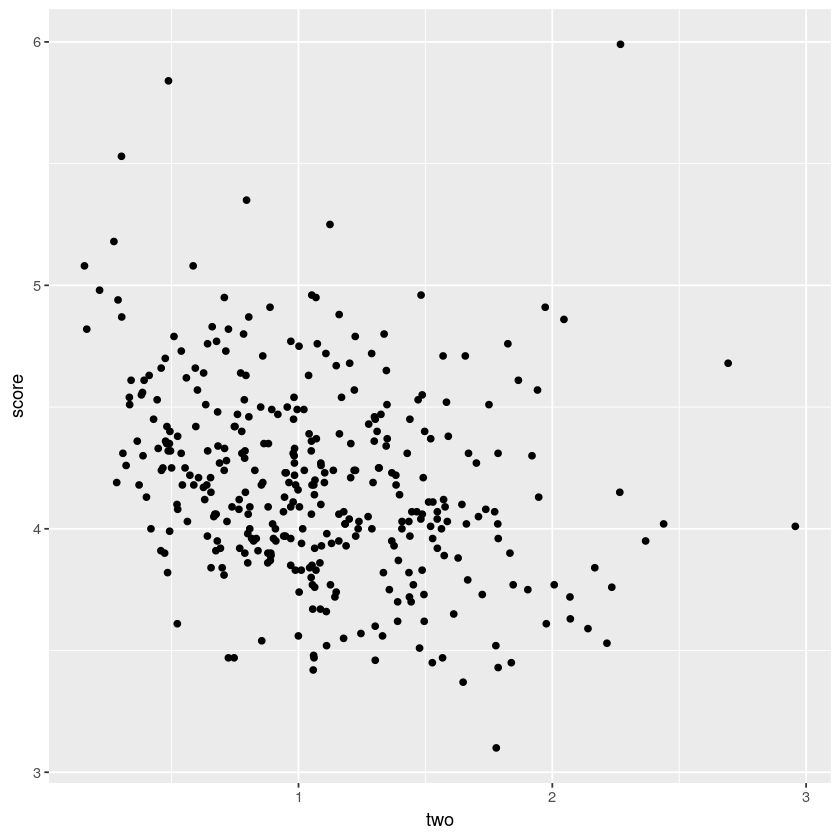

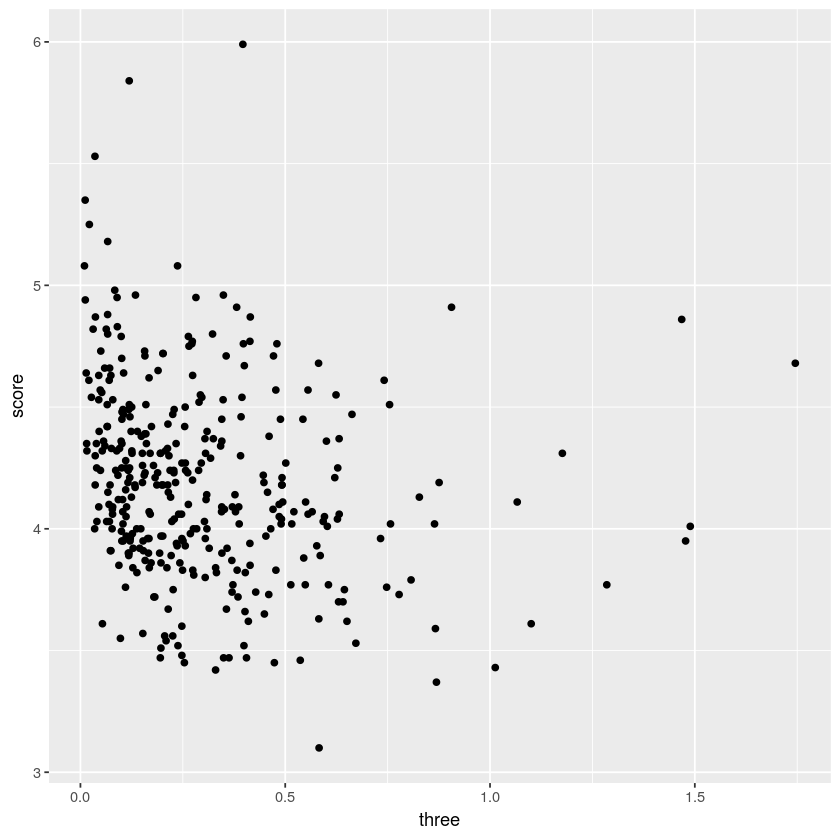

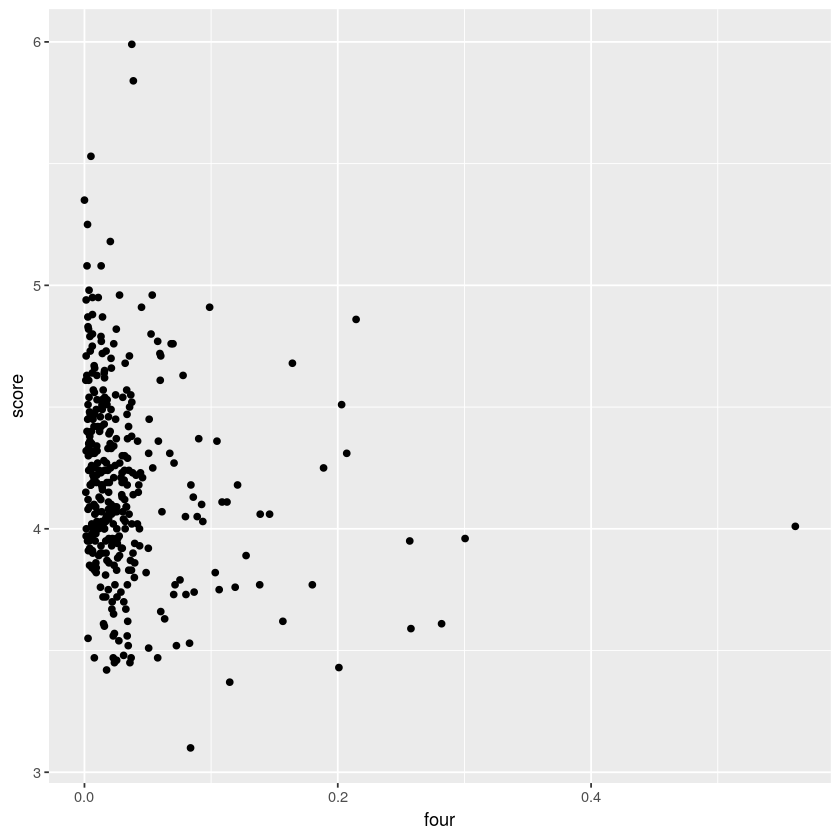

In [18]:
head(finalRes)

#finalRes$two <- as.factor(finalRes$two)
#finalRes$three <- as.factor(finalRes$three)
#finalRes$four <- as.factor(finalRes$four)


p <- ggplot(finalRes, aes(x=two, y=score))  + geom_point()
print(p)

p <- ggplot(finalRes, aes(x=three, y=score))  + geom_point()
print(p)

p <- ggplot(finalRes, aes(x=four, y=score))  + geom_point()
print(p)



In [19]:
print(mean(finalRes$score))
print(sd(finalRes$score))


[1] 4.19234
[1] 0.4036552


In [28]:
other <- combinedSet[order(-combinedSet$avg),]

other <- other[,6:13]

other <- filter(other, (avg <= (4.492672+.05)))

other <- filter(other, (avg >= (4.492672-.05)))

head(other, 50)

print(mean(as.numeric(unlist(other[,1]))))
      
print(mean(as.numeric(unlist(other[,2]))))
      
print(mean(as.numeric(unlist(other[,3]))))
            
print(mean(as.numeric(unlist(other[,4]))))

print(mean(as.numeric(unlist(other[,5]))))
    
print(mean(as.numeric(unlist(other[,6]))))
      
print(mean(as.numeric(unlist(other[,7]))))

1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),avg
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,2,13,35,32,15,3,4.54
0,2,13,32,32,17,3,4.54
0,2,16,31,31,17,3,4.54
0,2,16,33,29,16,4,4.53
0,3,13,35,34,14,2,4.53
0,4,16,29,29,18,4,4.53
1,4,17,28,26,18,6,4.52
0,1,13,34,34,15,2,4.51
0,5,24,25,18,17,11,4.51


[1] 0.1923077
[1] 2.884615
[1] 15.96154
[1] 31.88462
[1] 29.65385
[1] 15.92308
[1] 3.461538


In [21]:

#write.csv(combinedSet, "./combine.csv")

In [29]:
citation()
citation("ggplot2")
citation("tidyverse")
citation("dplyr")


To cite R in publications use:

  R Core Team (2022). R: A language and environment for statistical
  computing. R Foundation for Statistical Computing, Vienna, Austria.
  URL https://www.R-project.org/.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {R: A Language and Environment for Statistical Computing},
    author = {{R Core Team}},
    organization = {R Foundation for Statistical Computing},
    address = {Vienna, Austria},
    year = {2022},
    url = {https://www.R-project.org/},
  }

We have invested a lot of time and effort in creating R, please cite it
when using it for data analysis. See also ‘citation("pkgname")’ for
citing R packages.



To cite ggplot2 in publications, please use:

  H. Wickham. ggplot2: Elegant Graphics for Data Analysis.
  Springer-Verlag New York, 2016.

A BibTeX entry for LaTeX users is

  @Book{,
    author = {Hadley Wickham},
    title = {ggplot2: Elegant Graphics for Data Analysis},
    publisher = {Springer-Verlag New York},
    year = {2016},
    isbn = {978-3-319-24277-4},
    url = {https://ggplot2.tidyverse.org},
  }



To cite package ‘tidyverse’ in publications use:

  Wickham H, Averick M, Bryan J, Chang W, McGowan LD, François R,
  Grolemund G, Hayes A, Henry L, Hester J, Kuhn M, Pedersen TL, Miller
  E, Bache SM, Müller K, Ooms J, Robinson D, Seidel DP, Spinu V,
  Takahashi K, Vaughan D, Wilke C, Woo K, Yutani H (2019). “Welcome to
  the tidyverse.” _Journal of Open Source Software_, *4*(43), 1686.
  doi:10.21105/joss.01686 <https://doi.org/10.21105/joss.01686>.

A BibTeX entry for LaTeX users is

  @Article{,
    title = {Welcome to the {tidyverse}},
    author = {Hadley Wickham and Mara Averick and Jennifer Bryan and Winston Chang and Lucy D'Agostino McGowan and Romain François and Garrett Grolemund and Alex Hayes and Lionel Henry and Jim Hester and Max Kuhn and Thomas Lin Pedersen and Evan Miller and Stephan Milton Bache and Kirill Müller and Jeroen Ooms and David Robinson and Dana Paige Seidel and Vitalie Spinu and Kohske Takahashi and Davis Vaughan and Claus Wilke and Kara Woo and Hiroaki Y


To cite package ‘dplyr’ in publications use:

  Wickham H, François R, Henry L, Müller K, Vaughan D (2023). _dplyr: A
  Grammar of Data Manipulation_. R package version 1.1.0,
  <https://CRAN.R-project.org/package=dplyr>.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {dplyr: A Grammar of Data Manipulation},
    author = {Hadley Wickham and Romain François and Lionel Henry and Kirill Müller and Davis Vaughan},
    year = {2023},
    note = {R package version 1.1.0},
    url = {https://CRAN.R-project.org/package=dplyr},
  }


